## Javad Ranjbar Kermani
## 400209795
## Question 2 part b
## SVM (support vector method)#
## balanced data

In [33]:
# import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('factory products situation.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
# balancing data
Class1=df[df.Class==1]
Class0=df[df.Class==0]
Class0_undersampled=Class0.sample(n=492)
sampled_data=pd.concat([Class1,Class0_undersampled],axis=0)
shuffled_data=sampled_data.sample(frac=1)
shuffled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
252359,155769.0,1.738824,-0.115495,0.606574,3.619668,-0.677918,0.818215,-1.068147,0.465477,-0.187001,...,0.294065,0.629139,0.213287,-0.426229,-0.600384,-0.053419,0.016171,-0.025736,48.68,0
65340,51537.0,-0.944670,0.665806,1.700377,-0.008269,0.702929,-1.035995,0.730245,-0.094095,-1.242339,...,0.109915,0.156930,-0.267724,0.592565,0.472245,0.367118,-0.027210,0.057001,7.23,0
153972,100834.0,1.919498,-0.523770,-0.026501,0.293293,-0.545734,0.387612,-1.017510,0.109304,2.336963,...,-0.080323,0.119881,0.199899,-0.812040,-0.553431,0.468171,-0.040926,-0.055446,39.00,0
238821,149837.0,1.467823,-0.391802,-0.490174,4.032977,-0.019828,0.759069,-0.003476,0.125634,-0.513309,...,0.240331,0.480302,-0.155208,-0.317146,0.041205,0.112661,-0.046053,-0.024180,208.93,0
142224,84613.0,1.271017,-0.469918,0.728033,-0.794483,-1.172690,-0.656201,-0.684907,0.077405,2.079616,...,-0.053704,0.021784,-0.061567,0.006984,0.495945,-0.659124,0.083092,0.028338,1.00,0


In [36]:
values=shuffled_data.values
feature_names=shuffled_data.columns

In [37]:
target =np.where(feature_names =='Class')
tags=values[:,target].reshape((values.shape[0],)) # labels
features=values[:,1:6]# features
print(features.shape)
print(tags.shape)

(984, 5)
(984,)


number of class 0 : 492
number of class 1 : 492


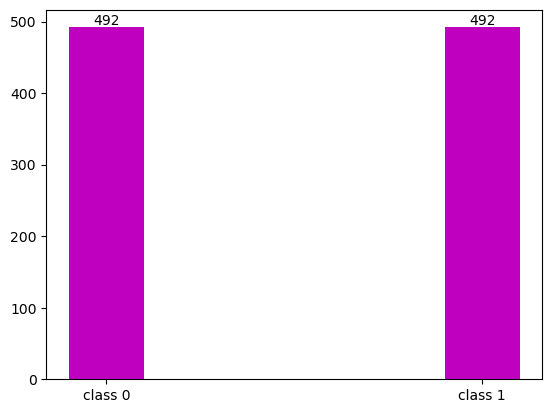

In [38]:
# plotting numer of class 0 and 1 after balancing data
class0_number=np.size(tags[tags==0])
class1_number=np.size(tags[tags==1])
print ('number of class 0 :', class0_number)
print ('number of class 1 :', class1_number)
# plotting number of data in two different label
a=['class 0','class 1']
plot = plt.bar(a,[class0_number,class1_number],width=0.2 , color='m')
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,height,str(height), ha='center', va='bottom')
plt.savefig('Q2b2.png', dpi = 200)

In [39]:
x = shuffled_data.iloc[:,1:6] # first 5 shuffled features
y = shuffled_data.iloc[:,-1] # shuffled targets

In [40]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## SVM Method

### Linear kernel

In [41]:
from sklearn.svm import SVC
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [42]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_linear = svm_linear_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_linear), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_linear), '\n')
print('f1 score =', f1_score(y_test, y_pred_linear), '\n')
print('recall score =', recall_score(y_test, y_pred_linear), '\n')

precision score = 0.9680851063829787 

accuracy score = 0.9035532994923858 

f1 score = 0.9054726368159204 

recall score = 0.8504672897196262 



### Poly kernel

In [43]:
svm_poly2_model = SVC(kernel='poly', degree = 2) #poly degree 2
svm_poly3_model = SVC(kernel='poly', degree = 3) #poly degree 3
svm_poly4_model = SVC(kernel='poly', degree = 4) #poly degree 4
svm_poly2_model.fit(x_train,y_train)
svm_poly3_model.fit(x_train,y_train)
svm_poly4_model.fit(x_train,y_train)

SVC(degree=4, kernel='poly')

In [44]:
y_pred_poly2 = svm_poly2_model.predict(x_test)
y_pred_poly3 = svm_poly3_model.predict(x_test)
y_pred_poly4 = svm_poly4_model.predict(x_test)
print('poly degree2 : \n')
print('precision score =', precision_score(y_test, y_pred_poly2))
print('accuracy score =', accuracy_score(y_test, y_pred_poly2))
print('f1 score =', f1_score(y_test, y_pred_poly2))
print('recall score =', recall_score(y_test, y_pred_poly2), '\n')
print('poly degree3 : \n')
print('precision score =', precision_score(y_test, y_pred_poly3))
print('accuracy score =', accuracy_score(y_test, y_pred_poly3))
print('f1 score =', f1_score(y_test, y_pred_poly3))
print('recall score =', recall_score(y_test, y_pred_poly3), '\n')
print('poly degree4 : \n')
print('precision score =', precision_score(y_test, y_pred_poly4))
print('accuracy score =', accuracy_score(y_test, y_pred_poly4))
print('f1 score =', f1_score(y_test, y_pred_poly4))
print('recall score =', recall_score(y_test, y_pred_poly4), '\n')

poly degree2 : 

precision score = 0.9873417721518988
accuracy score = 0.8477157360406091
f1 score = 0.8387096774193549
recall score = 0.7289719626168224 

poly degree3 : 

precision score = 1.0
accuracy score = 0.8121827411167513
f1 score = 0.7909604519774012
recall score = 0.6542056074766355 

poly degree4 : 

precision score = 1.0
accuracy score = 0.766497461928934
f1 score = 0.7261904761904762
recall score = 0.5700934579439252 



### rbf kernel

In [45]:
svm_rbf_model = SVC(kernel='rbf' , gamma = 'scale')
svm_rbf_model.fit(x_train,y_train)

SVC()

In [46]:
y_pred_rbf = svm_rbf_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_rbf), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_rbf), '\n')
print('f1 score =', f1_score(y_test, y_pred_rbf), '\n')
print('recall score =', recall_score(y_test, y_pred_rbf), '\n')

precision score = 0.9777777777777777 

accuracy score = 0.8934010152284264 

f1 score = 0.8934010152284264 

recall score = 0.822429906542056 



### Sigmoid kernel

In [47]:
svm_sigmoid_model = SVC(kernel='sigmoid')
svm_sigmoid_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [48]:
y_pred_sigmoid = svm_sigmoid_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_sigmoid), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_sigmoid), '\n')
print('f1 score =', f1_score(y_test, y_pred_sigmoid), '\n')
print('recall score =', recall_score(y_test, y_pred_sigmoid), '\n')

precision score = 0.8942307692307693 

accuracy score = 0.8730964467005076 

f1 score = 0.881516587677725 

recall score = 0.8691588785046729 

